In [1]:
import sys
sys.path.append('/mnt/cocoapi/PythonAPI/')

from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import json
from pathlib import Path
import csv
import cv2
from random import randrange

In [2]:
output_dir = '/mnt/data'
image_set = 'val'
anno_file = Path(output_dir, 'annotations', image_set+'.json')
coco=COCO(anno_file.as_posix())

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


In [3]:
coco.getCatIds()

[1, 2, 3, 4, 5]

In [4]:
print(coco.cats)

# blouse_cat = coco.cats[1]
# print(blouse_cat)

# blouse_cat['keypoints'] = ['neckline_left', 'neckline_right', 'center_front', 'shoulder_left', 
#                              'shoulder_right', 'armpit_left', 'armpit_right', 'cuff_left_in', 
#                              'cuff_left_out', 'cuff_right_in', 'cuff_right_out', 'top_hem_left', 
#                              'top_hem_right']
# blouse_cat['skeleton'] = [[1, 2], [1, 3], [2, 3], [1, 4], [4, 11], [6, 7], [6, 10], [2, 5], 
#                            [5, 13]]

# coco.cats[1] = blouse_cat 
# print(coco.cats[1])

{1: {'supercategory': 'blouse', 'id': 1, 'name': 'blouse', 'keypoints': ['center_front', 'neckline_left', 'shoulder_left', 'cuff_left_out', 'cuff_left_in', 'armpit_left', 'top_hem_left', 'top_hem_right', 'armpit_right', 'cuff_right_in', 'cuff_right_out', 'shoulder_right', 'neckline_right'], 'skeleton': [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 1], [6, 9], [6, 3], [6, 2], [9, 13], [9, 12]]}, 2: {'supercategory': 'dress', 'id': 2, 'name': 'dress', 'keypoints': ['center_front', 'neckline_left', 'shoulder_left', 'cuff_left_out', 'cuff_left_in', 'armpit_left', 'waistline_left', 'hemline_left', 'hemline_right', 'waistline_right', 'armpit_right', 'cuff_right_in', 'cuff_right_out', 'shoulder_right', 'neckline_right'], 'skeleton': [[1, 2], [1, 15], [2, 15], [2, 3], [2, 6], [3, 4], [4, 5], [5, 6], [6, 7], [6, 8], [6, 11], [7, 10], [8, 9], [9, 10], [9, 11], [10, 11], [11, 14], [11, 15], [11, 12], [12, 13], [13, 14], [14, 15]]}, 3:

554707533610960832
{'height': 512, 'width': 512, 'file_name': '94e01abf18f461668d2ada7f53ba0f32.jpg', 'id': 554707533610960832, 'category': 'trousers'}
/mnt/data/images/trousers/94e01abf18f461668d2ada7f53ba0f32.jpg
[5]
[{'segmentation': [], 'bbox': [102, 28, 310, 471], 'keypoints': [182, 28, 2, 337, 28, 2, 412, 482, 2, 277, 496, 2, 261, 220, 2, 237, 499, 2, 102, 477, 2], 'iscrowd': 0, 'image_id': 554707533610960832, 'category_id': 5, 'id': 12650430185029988005, 'area': 146010, '"num_keypoints"': 7}]


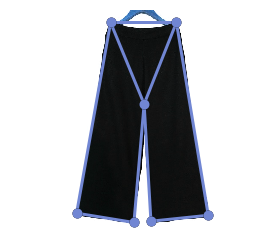

In [81]:
img_idx = coco.getImgIds()
img_id = img_idx[randrange(len(img_idx))]

# blouse
#img_id = 895906053124555157
print(img_id)
img_anno = coco.loadImgs([img_id])[0]
print(img_anno)
img_path = Path(output_dir, 'images', img_anno['category'], img_anno['file_name'])
print(img_path)
assert img_path.exists(), 'image not exists'
img_id
img = cv2.imread(img_path.as_posix())

catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==img_id:
        catIds.append(ann['category_id'])
print(catIds)

# coco.cats[2]['skeleton'] = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], 
#                             [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 1], [7, 10], [3, 7], 
#                             [14, 10], [3, 6]]
# coco.cats[3]['skeleton'] = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 9], [9, 10], [10, 11], [11, 12],
#                             [12, 13], [13, 14], [14, 1], [7, 8], [6, 7], [8, 9], [2, 6], [13, 9], [1, 5], [5, 7]]


plt.imshow(img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=[img_id], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)